**Business problem understanding**

Predicting the house prices

Column Name	Description
id	==>Unique ID for each home sale
date ==>	Date when the house was sold (e.g., 20140502)
price==> Sale price of the house (Target variable for regression)
bedrooms ==>	Number of bedrooms
bathrooms ==>	Number of bathrooms (can be fractional, e.g., 1.5)
sqft_living	==> Square footage of the interior living space
sqft_lot ==>	Square footage of the lot (land)
floors ==>	Number of floors (levels) in the house
waterfront ==>	Whether the house has a waterfront view (1 = yes, 0 = no)
view ==>	Index from 0 to 4 of how good the view is
condition ==>	Condition of the house (1 = worst, 5 = best)
grade ==>	Overall construction and design quality (1 to 13)
sqft_above ==>	Square footage of house apart from basement
sqft_basement ==>	Square footage of the basement
yr_built ==>	Year the house was originally built
yr_renovated ==>	Year the house was last renovated (0 if never)
zipcode	==> Zip code of the house location
lat ==>	Latitude (GPS coordinate)
long ==>	Longitude (GPS coordinate)
sqft_living15	==> Living room area (in sqft) of nearest 15 neighbors
sqft_lot15	==> Lot size of nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\upend\Downloads\houseR.xlsx") 
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
df.shape

(21613, 21)

Observation:this dataset contains 21613 rows and 21 columnns

In [6]:
df["id"].unique

<bound method Series.unique of 0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21613, dtype: int64>

In [7]:
df["id"].value_counts()

id
795000620     3
2231500030    2
1237500540    2
6117501820    2
7853420110    2
             ..
8091400200    1
3814700200    1
1202000200    1
1794500383    1
2008000270    1
Name: count, Length: 21436, dtype: int64

In [8]:
df["date"].unique

<bound method Series.unique of 0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object>

In [9]:
df["date"].value_counts()

date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150131T000000      1
20150117T000000      1
20150308T000000      1
20150515T000000      1
20140803T000000      1
Name: count, Length: 372, dtype: int64

In [10]:
df["price"].unique

<bound method Series.unique of 0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64>

In [11]:
df["price"].value_counts()

price
450000     172
350000     172
550000     159
500000     152
425000     150
          ... 
341780       1
1987500      1
504600       1
531155       1
819995       1
Name: count, Length: 4028, dtype: int64

In [56]:
df["bedrooms"].unique

<bound method Series.unique of 0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64>

In [57]:
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [58]:
df["bathrooms"].unique

<bound method Series.unique of 0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64>

In [59]:
df["bathrooms"].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.50       2
6.25       2
7.75       1
7.50       1
Name: count, dtype: int64

In [60]:
df["sqft_living"].unique

<bound method Series.unique of 0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64>

In [61]:
df["sqft_living"].value_counts()

sqft_living
1300    138
1400    135
1440    133
1660    129
1800    129
       ... 
2398      1
2656      1
3281      1
1458      1
1572      1
Name: count, Length: 1038, dtype: int64

In [62]:
df["sqft_lot"].unique

<bound method Series.unique of 0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21608     1131
21609     5813
21610     1350
21611     2388
21612     1076
Name: sqft_lot, Length: 21613, dtype: int64>

In [63]:
df["sqft_lot"].value_counts()

sqft_lot
5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
2642       1
2656       1
15035      1
638        1
13405      1
Name: count, Length: 9782, dtype: int64

In [64]:
df["floors"].unique

<bound method Series.unique of 0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21608    3.0
21609    2.0
21610    2.0
21611    2.0
21612    2.0
Name: floors, Length: 21613, dtype: float64>

In [65]:
df["floors"].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [66]:
df["waterfront"].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: waterfront, Length: 21613, dtype: int64>

In [67]:
df["waterfront"].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [68]:
df["view"].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: view, Length: 21613, dtype: int64>

In [69]:
df["view"].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [70]:
df["condition"].unique

<bound method Series.unique of 0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21613, dtype: int64>

In [71]:
df["condition"].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [72]:
df["grade"].unique

<bound method Series.unique of 0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: int64>

In [73]:
df["grade"].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [74]:
df["sqft_above"].unique

<bound method Series.unique of 0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_above, Length: 21613, dtype: int64>

In [75]:
df["sqft_above"].value_counts()

sqft_above
1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3906      1
4073      1
2578      1
2738      1
1606      1
Name: count, Length: 946, dtype: int64

In [76]:
df["sqft_basement"].unique

<bound method Series.unique of 0          0
1        400
2          0
3        910
4          0
        ... 
21608      0
21609      0
21610      0
21611      0
21612      0
Name: sqft_basement, Length: 21613, dtype: int64>

In [77]:
df["sqft_basement"].value_counts()

sqft_basement
0       13126
600       221
700       218
500       214
800       206
        ...  
176         1
225         1
1275        1
274         1
248         1
Name: count, Length: 306, dtype: int64

In [78]:
df["yr_built"].unique

<bound method Series.unique of 0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64>

In [79]:
df["yr_built"].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

In [80]:
df["yr_renovated"].unique

<bound method Series.unique of 0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64>

In [81]:
df["yr_renovated"].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [82]:
df["zipcode"].unique

<bound method Series.unique of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64>

In [83]:
df["zipcode"].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [84]:
df["lat"].unique

<bound method Series.unique of 0        47.5112
1        47.7210
2        47.7379
3        47.5208
4        47.6168
          ...   
21608    47.6993
21609    47.5107
21610    47.5944
21611    47.5345
21612    47.5941
Name: lat, Length: 21613, dtype: float64>

In [85]:
df["lat"].value_counts()

lat
47.6846    17
47.6624    17
47.5491    17
47.5322    17
47.6711    16
           ..
47.2581     1
47.6047     1
47.3008     1
47.4295     1
47.2962     1
Name: count, Length: 5034, dtype: int64

In [86]:
df["long"].unique

<bound method Series.unique of 0       -122.257
1       -122.319
2       -122.233
3       -122.393
4       -122.045
          ...   
21608   -122.346
21609   -122.362
21610   -122.299
21611   -122.069
21612   -122.299
Name: long, Length: 21613, dtype: float64>

In [87]:
df["long"].value_counts()

long
-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.316      1
-121.941      1
-121.480      1
-121.767      1
-122.420      1
Name: count, Length: 752, dtype: int64

In [88]:
df["sqft_living15"].unique

<bound method Series.unique of 0        1340
1        1690
2        2720
3        1360
4        1800
         ... 
21608    1530
21609    1830
21610    1020
21611    1410
21612    1020
Name: sqft_living15, Length: 21613, dtype: int64>

In [89]:
df["sqft_living15"].value_counts()

sqft_living15
1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
2513      1
2725      1
1955      1
2527      1
4443      1
Name: count, Length: 777, dtype: int64

In [90]:
df["sqft_lot15"].unique

<bound method Series.unique of 0        5650
1        7639
2        8062
3        5000
4        7503
         ... 
21608    1509
21609    7200
21610    2007
21611    1287
21612    1357
Name: sqft_lot15, Length: 21613, dtype: int64>

In [91]:
df["sqft_lot15"].value_counts()

sqft_lot15
5000    427
4000    357
6000    289
7200    211
4800    145
       ... 
5259      1
3836      1
5009      1
1395      1
5761      1
Name: count, Length: 8689, dtype: int64

**EDA**

In [92]:
continuous=['price','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']
count =['bedrooms','floors','yr_built','yr_renovated']
categorical=['waterfront','view','condition','grade','zipcode']

In [93]:
df[continuous].describe()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2.114757,2079.899736,1.510697e+04,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.770163,918.440897,4.142051e+04,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,290.000000,5.200000e+02,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,1.750000,1427.000000,5.040000e+03,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,2.250000,1910.000000,7.618000e+03,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,2.500000,2550.000000,1.068800e+04,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


This dataset contains 21,613 house records with numerical details about property features, location, and sale price.
It provides insights into how various attributes (like size, bathrooms, and location) influence housing prices.

In [94]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [95]:
df[categorical].describe()

,waterfront,view,condition,grade,zipcode
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.007542,0.234303,3.409430,7.656873,98077.939805
std,0.086517,0.766318,0.650743,1.175459,53.505026
min,0.000000,0.000000,1.000000,1.000000,98001.000000
25%,0.000000,0.000000,3.000000,7.000000,98033.000000
50%,0.000000,0.000000,3.000000,7.000000,98065.000000
75%,0.000000,0.000000,4.000000,8.000000,98118.000000
max,1.000000,4.000000,5.000000,13.000000,98199.000000


In [96]:
df[continuous].skew()

price             4.024069
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
sqft_above        1.446664
sqft_basement     1.577965
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

**univariate analysis**

<Axes: xlabel='price', ylabel='Count'>

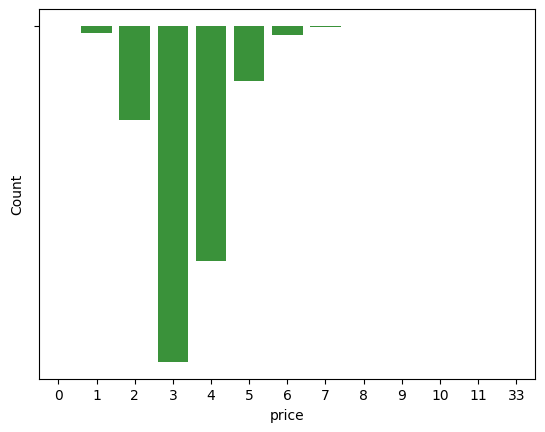

In [97]:
sns.histplot(df['price'])
sns.boxplot(x=df['price'])
sns.countplot(x='bedrooms', data=df)


**Bivariate **

<Axes: xlabel='sqft_living', ylabel='price'>

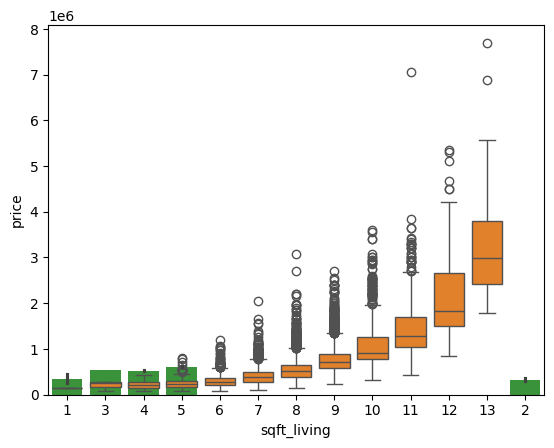

In [98]:
sns.scatterplot(x='sqft_living', y='price', data=df)
sns.boxplot(x='grade', y='price', data=df)
sns.barplot(x='condition', y='price', data=df)


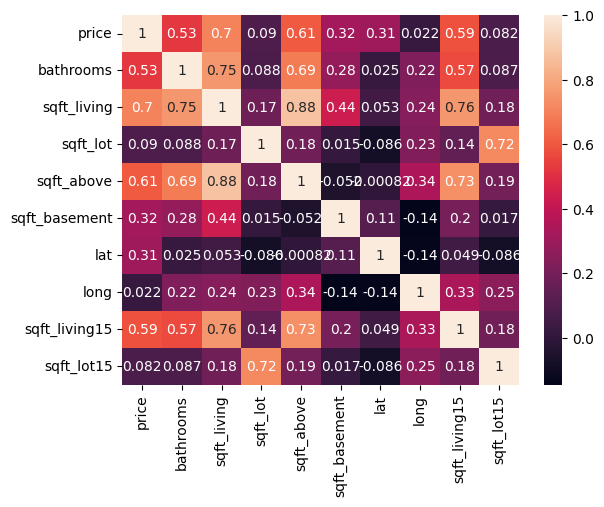

In [100]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

**Data Cleaning**

In [101]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [102]:

df.drop(['id', 'date'], axis=1, inplace=True)


In [103]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Encoding**

In [104]:
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [105]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['view', 'condition', 'grade']
encoder = OrdinalEncoder()
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])


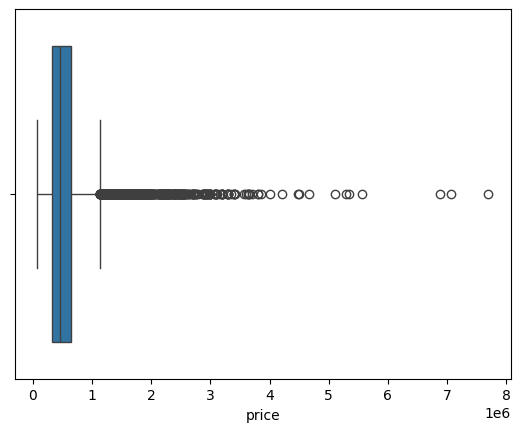

In [106]:
# Plot price to detect outliers
sns.boxplot(x=df['price'])
plt.show()


In [107]:
df = df[df['bedrooms'] < 10]
df = df[df['bathrooms'] < 10]


In [108]:
# Usually fine, but double-check 'yr_renovated'
df['yr_renovated'] = df['yr_renovated'].astype(int)


**Feature**

In [109]:
# Create new features
df['house_age'] = 2015 - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)


In [110]:
# Usually fine, but double-check 'yr_renovated'
df['yr_renovated'] = df['yr_renovated'].astype(int)


In [111]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,house_age,renovated
0,221900,3,1.00,1180,5650,1.0,0,0.0,2.0,5.0,...,False,False,False,False,True,False,False,False,60,0
1,538000,3,2.25,2570,7242,2.0,0,0.0,2.0,5.0,...,False,False,False,False,False,False,False,False,64,1
2,180000,2,1.00,770,10000,1.0,0,0.0,2.0,4.0,...,False,False,False,False,False,False,False,False,82,0
3,604000,4,3.00,1960,5000,1.0,0,0.0,4.0,5.0,...,False,False,False,False,False,False,False,False,50,0
4,510000,3,2.00,1680,8080,1.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,0
21609,400000,4,2.50,2310,5813,2.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,1,0
21610,402101,2,0.75,1020,1350,2.0,0,0.0,2.0,5.0,...,False,False,False,False,False,False,False,False,6,0
21611,400000,3,2.50,1600,2388,2.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,11,0


In [112]:
df.shape

(21608, 89)

Create X and Y

In [113]:
x= df.drop('price', axis=1)
y= df['price']


In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

After one hot encode zipcode,the no. of columns increased a lot so we apply PCA

**PCA**

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(x_scaled)
print("Original features:=",x.shape[1])
print("Reduced features:",x_pca.shape[1])

Original features:= 88
Reduced features: 72


In [116]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,house_age,renovated
0,221900,3,1.00,1180,5650,1.0,0,0.0,2.0,5.0,...,False,False,False,False,True,False,False,False,60,0
1,538000,3,2.25,2570,7242,2.0,0,0.0,2.0,5.0,...,False,False,False,False,False,False,False,False,64,1
2,180000,2,1.00,770,10000,1.0,0,0.0,2.0,4.0,...,False,False,False,False,False,False,False,False,82,0
3,604000,4,3.00,1960,5000,1.0,0,0.0,4.0,5.0,...,False,False,False,False,False,False,False,False,50,0
4,510000,3,2.00,1680,8080,1.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,0
21609,400000,4,2.50,2310,5813,2.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,1,0
21610,402101,2,0.75,1020,1350,2.0,0,0.0,2.0,5.0,...,False,False,False,False,False,False,False,False,6,0
21611,400000,3,2.50,1600,2388,2.0,0,0.0,2.0,6.0,...,False,False,False,False,False,False,False,False,11,0


In [117]:
x.shape

(21608, 88)

In [118]:
x_pca.shape

(21608, 72)

In [119]:
df.to_excel("cleaned1.xlsx",index=False)

**LOAD**

In [120]:
df=pd.read_excel("cleaned1.xlsx")
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,house_age,renovated
0,221900,3,1.00,1180,5650,1.0,0,0,2,5,...,False,False,False,False,True,False,False,False,60,0
1,538000,3,2.25,2570,7242,2.0,0,0,2,5,...,False,False,False,False,False,False,False,False,64,1
2,180000,2,1.00,770,10000,1.0,0,0,2,4,...,False,False,False,False,False,False,False,False,82,0
3,604000,4,3.00,1960,5000,1.0,0,0,4,5,...,False,False,False,False,False,False,False,False,50,0
4,510000,3,2.00,1680,8080,1.0,0,0,2,6,...,False,False,False,False,False,False,False,False,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,360000,3,2.50,1530,1131,3.0,0,0,2,6,...,False,False,False,False,False,False,False,False,6,0
21604,400000,4,2.50,2310,5813,2.0,0,0,2,6,...,False,False,False,False,False,False,False,False,1,0
21605,402101,2,0.75,1020,1350,2.0,0,0,2,5,...,False,False,False,False,False,False,False,False,6,0
21606,400000,3,2.50,1600,2388,2.0,0,0,2,6,...,False,False,False,False,False,False,False,False,11,0


In [121]:
df.shape

(21608, 89)

**MODELLING**

1.Linear Regression

In [122]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)


Intercept: -28060239.794699315
Coefficients: [-2.96156709e+04  2.15565210e+04  1.17812807e+02  2.41247289e-01
 -4.24588945e+04  6.62615740e+05  5.49912496e+04  2.67179072e+04
  5.51198554e+04  9.68696567e+01  2.09684163e+01 -3.66783524e+02
  2.85614075e+03  2.30080363e+05 -1.43243415e+05  8.59775712e+00
 -9.35402027e-02  3.36919198e+04 -1.99306215e+04  6.99213083e+05
  2.41300278e+05  2.20780854e+05  1.96911846e+05  2.05502774e+05
  9.74452480e+04  3.12926337e+04  7.38797680e+04  3.74502141e+04
  4.80104372e+04 -5.05986889e+04  1.53116566e+05  1.46835451e+05
  1.67718810e+04  1.89570755e+05  5.20309587e+03  6.88765482e+03
 -1.02963064e+04  2.93472528e+05  1.13518785e+05  4.79525793e+04
  1.32076112e+06  4.53192352e+05  1.17756688e+04  1.26737775e+05
  1.61477085e+05  1.42981748e+05  2.29874802e+04  6.60589471e+04
  1.21563044e+04  5.71337735e+04  8.94915246e+04 -7.26184808e+04
  7.04832863e+04  1.33679141e+05  1.33362640e+05  3.84944071e+04
 -2.80037248e+04  4.49045304e+05  2.48122242e

In [123]:
#prediction
ypred_test=model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print("Test MAE:",mean_absolute_error(y_test,ypred_test))
from sklearn.metrics import mean_squared_error
print("Test MSE:",mean_squared_error(y_test,ypred_test))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",model.score(x_test,y_test))

Test MAE: 95487.61130758081
Test MSE: 24724055196.82489
Test RMSE: 157238.8476071511
Test R2: 0.8129897786209257


Model Selection

In [124]:
ypred_train=model.predict(x_train)
#train R2
print("Train R2:",model.score(x_train,y_train))
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)
print("Cross Validation Score:",scores.mean())


Train R2: 0.8078998964388705
[0.79463063 0.7896096  0.80441901 0.82680509 0.81157469]
Cross Validation Score: 0.8054078050344786


**MultiLinear Regression**

In [125]:
x= df.drop('price', axis=1)
y= df['price']


In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)


In [127]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print("Intercept:",model.intercept_)
print("coefficients:",model.coef_)
y_pred=model.predict(x_test)
print("Test R2:",model.score(x_test,y_test))
train_predictions=model.predict(x_train)
print("Train R2:",model.score(x_train,y_train))
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(model,x,y,cv=5).mean())

Intercept: -16993996.895115618
coefficients: [-3.03725059e+04  2.40394648e+04  1.12731182e+02  2.64065349e-01
 -4.68542838e+04  6.44903732e+05  5.78381087e+04  2.57896634e+04
  5.76575889e+04  9.82456658e+01  1.44855019e+01 -3.67982435e+02
  2.76333747e+03  1.80826072e+05 -7.17904661e+04  1.12816619e+01
 -1.98056548e-01  3.53888665e+04 -2.34095989e+04  7.27850911e+05
  2.50267767e+05  2.21479427e+05  1.91521121e+05  2.11567254e+05
  9.25532136e+04  4.16772162e+04  6.40392956e+04  3.69076462e+04
  2.28279939e+04 -4.07840303e+04  1.51491963e+05  1.43316964e+05
  4.06708238e+04  1.82480179e+05 -2.95134706e+03  4.95733267e+03
 -1.38985722e+03  3.01312035e+05  1.33068074e+05  4.01487644e+04
  1.28840639e+06  4.56150243e+05  5.17700378e+03  9.36824394e+04
  1.66732375e+05  1.35908710e+05  2.94006760e+04  6.46957098e+04
  1.35764537e+04  6.19555760e+04  7.44742113e+04 -5.54576631e+04
  8.45354833e+04  1.27456696e+05  1.21093726e+05  5.11953221e+04
 -2.45707884e+04  4.71431703e+05  2.69441054e

**Polynomial Regression**

In [128]:
x= df.drop('price', axis=1)
y= df['price']


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [130]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
x_train=pd.DataFrame(polynomial_converter.fit_transform(x_train))
x_test=pd.DataFrame(polynomial_converter.transform(x_test))

In [131]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [132]:
print(model.intercept_)
print(model.coef_)
#prediction
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
#Evalution
model.score(x_train,y_train)
model.score(x_test,y_test)

-358738370.013219
[-8.83782371e+00  1.01310617e-01 -1.27628017e-01 ... -9.69137724e+01
  4.94305322e+02  3.26459236e-01]


0.8789439763762354

**comparision with linear Regression**

In [133]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
x_poly=polynomial_converter.fit_transform(x)
x_poly=pd.DataFrame(x_poly)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8115863571287878
0.8013720185624058


In [134]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_poly,y,cv=5)
print(scores)
scores.mean()

[0.88964781 0.89608274 0.88969116 0.8820766  0.87766844]


np.float64(0.8870333500845347)

**Hyperparameter Tuning**

In [135]:
train_r2=[]
test_r2=[]
for i in range(1,10):
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
    x_poly=polynomial_converter.fit_transform(x)
    x_poly=pd.DataFrame(x_poly)

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)

    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)

    train_r2.append(model.score(x_train,y_train))
    test_r2.append(model.score(x_test,y_test))
    

In [136]:
train_r2

[0.8115863571287878,
 0.8115863571287878,
 0.8115863571287878,
 0.8115863571287878,
 0.8115863571287878,
 0.8115863571287878,
 0.8115863571287878,
 0.8115863571287878,
 0.8115863571287878]

In [137]:
test_r2

[0.8013720185624058,
 0.8013720185624058,
 0.8013720185624058,
 0.8013720185624058,
 0.8013720185624058,
 0.8013720185624058,
 0.8013720185624058,
 0.8013720185624058,
 0.8013720185624058]

**Lasso Regression**

In [138]:
x= df.drop('price', axis=1)
y= df['price']


In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [140]:
from sklearn.linear_model import Lasso
lasso_base=Lasso()
lasso_base.fit(x_train,y_train)
#predictions
train_predictions=lasso_base.predict(x_train)
test_predictions=lasso_base.predict(x_test)
#evaluation
print("Train R2:", lasso_base.score(x_train, y_train))
print("Test R2:", lasso_base.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(lasso_base,x,y,cv=5).mean())


Train R2: 0.811062792685611
Test R2: 0.8007847935095722
Cross Validation Score: 0.8049107055179313


In [141]:
from sklearn.model_selection import GridSearchCV
estimator=Lasso()
param_grid={"alpha":[0.1,0.2,0.5,0.7,1,10,50,100,1000]}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 0.1}

In [142]:
from sklearn.linear_model import Lasso
lasso_best=Lasso(alpha=50)
lasso_best.fit(x_train,y_train)
print("Intercept:",lasso_best.intercept_)
print("coefficients:",lasso_best.coef_)
#predictions
train_predictions=lasso_best.predict(x_train)
test_predictions=lasso_best.predict(x_test)
#evaluation
print("Train R2:", lasso_best.score(x_train, y_train))
print("Test R2:", lasso_best.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(lasso_base,x,y,cv=5).mean())


Intercept: -21011350.646373864
coefficients: [-2.90569863e+04  2.61549287e+04  2.51896898e+02  1.97175849e-01
 -4.47898150e+04  6.17932637e+05  5.67235682e+04  2.52342660e+04
  5.80562466e+04 -4.65997982e+01 -1.25333820e+02 -1.93301386e+03
  1.80715098e+01  4.84645410e+05 -1.29613624e+04  1.01499510e+01
 -1.39235771e-01  1.27366825e+04 -2.02218216e+04  6.24082849e+05
  1.41474521e+05  1.33761835e+05  7.37358732e+04  7.60210088e+04
  4.28827816e+04 -9.47683081e+04 -4.25234389e+04 -1.15485572e+05
  2.42838932e+04 -4.55127010e+04  7.33625437e+03  5.29829975e+04
 -1.04378615e+05  7.88948031e+04 -2.81928786e+04 -3.94043471e+04
 -2.25376138e+04  1.70587834e+05 -7.69639729e+03 -4.07652629e+03
  9.50504698e+05  3.84584892e+05 -3.53355988e+04  1.60244401e+04
  3.46924650e+04 -0.00000000e+00 -3.20800777e+04 -1.05844917e+04
 -4.06103437e+04 -1.31330607e+04 -1.70231635e+04 -8.97663465e+04
 -7.22187527e+04  8.56818482e+03  1.55788799e+04 -1.08030214e+05
 -3.29024247e+04  3.48395985e+05  1.43936721e

**Ridge Regression**

In [143]:
x= df.drop('price', axis=1)
y= df['price']


In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [145]:
from sklearn.linear_model import Ridge
ridge_base=Ridge()
ridge_base.fit(x_train,y_train)
#prediction
train_predictions=ridge_base.predict(x_train)
test_predictions=ridge_base.predict(x_test)
#evalution
print("Train R2:",ridge_base.score(x_train,y_train))
print("Test R2:",ridge_base.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(ridge_base,x,y,cv=5).mean())

Train R2: 0.8054366682231714
Test R2: 0.816465782619702
Cross Validation Score: 0.8047821861103867


In [146]:
from sklearn.model_selection import GridSearchCV
#model
estimator=Ridge()
#parameters & values
param_grid={"alpha":[0.1,0.2,0.5,0.7,1,10,50,100,1000]}
#Identifying the best value of the parameter within given values for the given data
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_
 

{'alpha': 0.1}

In [147]:
from sklearn.linear_model import Ridge
ridge_best=Ridge(alpha=1)
ridge_best.fit(x_train,y_train)
print("Intercepts:",ridge_best.intercept_)
print("coefficients:",ridge_best.coef_)
#predictions
train_predictions=ridge_best.predict(x_train)
test_predictions=ridge_best.predict(x_test)
#evaluation
print("Train R2:",ridge_best.score(x_train,y_train))
print("Test R2:",ridge_best.score(x_test,y_test))
print("Cross Validation Score:",cross_val_score(ridge_base,x,y,cv=5).mean())



Intercepts: -32436058.747396834
coefficients: [-2.78339710e+04  2.48399515e+04  1.09806509e+02  2.29580804e-01
 -4.37825447e+04  6.46468981e+05  5.46368734e+04  2.52243613e+04
  5.61875114e+04  9.48389495e+01  1.49679753e+01 -3.77908490e+02
  1.27489410e+02  4.58610837e+05 -9.09490121e+04  1.39414813e+01
 -1.43680907e-01  1.50118211e+04 -4.11130274e+04  5.90062415e+05
  1.52681878e+05  1.39633224e+05  9.60138659e+04  9.90291312e+04
  5.93469111e+04 -9.72285367e+04 -4.96008796e+04 -1.00921696e+05
  3.90213053e+04 -6.53270040e+04  5.90807255e+04  7.06288938e+04
 -1.01935231e+05  9.14187442e+04 -3.46964334e+04 -4.70015845e+04
 -5.22513424e+04  1.74627759e+05 -4.31594426e+03  3.08158247e+03
  1.11408788e+06  3.61929185e+05 -3.13226706e+04  4.08399270e+04
  4.54656640e+04  1.99212757e+04 -3.62921557e+04 -9.71568246e+03
 -4.27900468e+04 -9.54069800e+03 -7.31053767e+03 -1.03843774e+05
 -6.02062274e+04  2.43625270e+04  3.32521267e+04 -8.18494873e+04
 -4.73264383e+04  3.53130753e+05  1.41805830

**Elastic Net Regression**

In [148]:
x= df.drop('price', axis=1)
y= df['price']


In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [150]:
from sklearn.linear_model import ElasticNet
enr_base=ElasticNet()
enr_base.fit(x_train,y_train)
#prediction
train_predictions=enr_base.predict(x_train)
test_predictions=enr_base.predict(x_test)
#evalution
print("Train R2:",enr_base.score(x_train,y_train))
print("Test R2:",enr_base.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(ridge_base,x,y,cv=5).mean())

Train R2: 0.6235651046311241
Test R2: 0.6355021332329163
Cross Validation Score: 0.8047821861103867


In [151]:
from sklearn.model_selection import GridSearchCV
#model
estimator=Ridge()
#parameters & values
param_grid={"alpha":[0.1,0.2,0.5,0.7,1,10,50,100,1000]}
#Identifying the best value of the parameter within given values for the given data
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 0.1}

In [152]:
from sklearn.linear_model import ElasticNet
enr_best=ElasticNet(alpha=1)
enr_best.fit(x_train,y_train)
print("Intercepts:",enr_best.intercept_)
print("coefficients:",enr_best.coef_)
#predictions
train_predictions=enr_best.predict(x_train)
test_predictions=enr_best.predict(x_test)
#evaluation
print("Train R2:",enr_best.score(x_train,y_train))
print("Test R2:",enr_best.score(x_test,y_test))
print("Cross Validation Score:",cross_val_score(enr_base,x,y,cv=5).mean())



Intercepts: 1481283.5291517596
coefficients: [-2.57013493e+04  1.56235129e+04  2.77304910e+02  1.08111648e-04
  1.33713556e+04  8.63630114e+03  3.89157390e+04  7.85377766e+03
  5.87550868e+04 -6.46132742e+01 -7.67333753e+01 -1.81826378e+03
  2.59639485e+01  1.98716683e+04 -6.36829641e+03  5.59145513e+01
 -6.22904351e-01 -2.01739718e+03 -4.37092646e+03  1.47852824e+04
  1.22459691e+03  2.22555684e+03  6.08805453e+02  1.98518020e+03
 -6.20514595e+02 -1.29208316e+03 -1.37661108e+02 -9.90950245e+02
 -2.47484236e+03 -8.31389546e+03  2.06933324e+02 -2.72631139e+02
 -1.58719511e+03  1.15435432e+03 -3.07038884e+03 -3.51791275e+03
 -1.94098420e+03  6.75262860e+03  1.60121531e+03 -5.58788131e+03
  4.65511461e+03  6.93675585e+03 -6.48539280e+03 -6.70340100e+02
  2.08973162e+03  1.48723629e+03 -3.08693225e+03 -2.23959414e+03
 -5.17842133e+03 -3.33074912e+03 -2.56299369e+03  2.16606929e+01
 -7.61049406e+02 -5.23004204e+02 -9.05375005e+02 -1.15232662e+03
 -5.70728797e+03  2.59495491e+03  5.41071611e

**Description**
This project aims to predict house prices based on various features such as the number of bathrooms, living area, lot size, location, and nearby property characteristics. Using a regression-based machine learning model, the system learns patterns from historical housing data to estimate property prices accurately.

The dataset consists of 21,613 records and 10 key numerical attributes.
It includes features like sqft_living, sqft_lot, bathrooms, sqft_basement, and geographical coordinates (lat, long). The average house price is around $540,000, with prices ranging from $75,000 to $7.7 million, reflecting both small homes and luxury estates.

Through data preprocessing, feature analysis, and model training, this project identifies the most significant factors affecting housing prices. Models such as Linear Regression, Random Forest, or XGBoost can be applied to predict the price of a house given its attributes.